<a href="https://colab.research.google.com/github/Keerthishankar-Punchithaya/IPL-MatchAnalytics/blob/main/FT_DA_101_Project_2A_IPL_Match_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***IPL Match Analytics***

---



# **Web Scraping**

---



---



**1. Handling Null Values**

In [1]:
# install selenium and pandas

!pip install selenium
!pip install pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 461.6/461.6 kB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.8 MB/s eta 0:00:00


In [2]:
import csv
import selenium
import pandas as pd
from selenium import webdriver
from selenium.common import NoSuchElementException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import numpy as np

# Set Chrome options (optional)
options = webdriver.ChromeOptions()
options.add_argument('--headless')

# Create a new Chrome session
driver = webdriver.Chrome(options=options)

with open("IPL_Match_Analytics.csv",'a+',encoding='UTF8',newline='') as f:
    writer=csv.writer(f)
    header=['season','matchnumber','venue','dateandtime','winningteam','firstteam','secondteam','link']
    writer.writerow(header)


start_season_yr = 2008
end_season_yr = 2023

for yr in range(start_season_yr, end_season_yr+1):
    # Open the website
    driver.get(f"https://www.iplt20.com/matches/results/{yr}")

    # Wait for elements to be present
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '/html/body/div[3]/div[4]/div/div/div/div/div/div[1]/div/div[2]/ul/li/div[1]/div[1]/span[1]')))

    print(f"Scrapping data for year: {yr}")
    matchnumber_list = driver.find_elements(By.XPATH,'/html/body/div[3]/div[4]/div/div/div/div/div/div[1]/div/div[2]/ul/li/div[1]/div[1]/span[1]')
    venue_list= driver.find_elements(By.XPATH,'/html/body/div[3]/div[4]/div/div/div/div/div/div[1]/div/div[2]/ul/li/div[1]/div[2]/span/p')
    dateandtime_list= driver.find_elements(By.XPATH,'/html/body/div[3]/div[4]/div/div/div/div/div/div[1]/div/div[2]/ul/li/div[1]/div[2]/div')
    winningteam_list = driver.find_elements(By.XPATH,'/html/body/div[3]/div[4]/div/div/div/div/div/div[1]/div/div[2]/ul/li/div[2]/div[1]/div')
    firstteam_list = driver.find_elements(By.XPATH,'/html/body/div[3]/div[4]/div/div/div/div/div/div[1]/div/div[2]/ul/li/div[2]/div[2]/div/div[1]')
    secondteam_list = driver.find_elements(By.XPATH, '/html/body/div[3]/div[4]/div/div/div/div/div/div[1]/div/div[2]/ul/li/div[2]/div[2]/div/div[2]')
    links_list = driver.find_elements(By.XPATH,'/html/body/div[3]/div[4]/div/div/div/div/div/div[1]/div/div[2]/ul/li/div[2]/div[3]/div/a')

    print(f"->writing for year: {yr}")
    for i in range(len(matchnumber_list)):
        rows = [yr,matchnumber_list[i].text, venue_list[i].text, dateandtime_list[i].text, winningteam_list[i].text,firstteam_list[i].text,secondteam_list[i].text,links_list[i].get_attribute('href')]
        with open("IPL_Match_Analytics.csv", 'a+', encoding='UTF8', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(rows)
    print(f"->finished writing for year: {yr}//")

SessionNotCreatedException: ignored

# **Data Cleaning**

---



---



In [3]:
# install csv and pandas

!pip install csv
!pip install pandas


ERROR: Could not find a version that satisfies the requirement csv (from versions: none)
ERROR: No matching distribution found for csv


In [4]:
import csv
import pandas as pd
data=pd.read_csv("IPL_Match_Analytics.csv")
# data=pd.read_csv("ipl_2022_dataset.csv")
df=pd.DataFrame(data, columns=["season","matchnumber", "venue", "dateandtime", "winningteam", "firstteam", "secondteam", "link"])
print(df.head())

   season matchnumber                              venue  \
0    2008    MATCH 59      DY Patil Stadium, NAVI MUMBAI   
1    2008    MATCH 58           Wankhede Stadium, Mumbai   
2    2008    MATCH 57           Wankhede Stadium, Mumbai   
3    2008    MATCH 56          IS Bindra Stadium, Mohali   
4    2008    MATCH 55  M. Chinnaswamy Stadium, Bengaluru   

                 dateandtime                           winningteam  \
0   JUN, SUN 1 , 8:00 pm IST     RAJASTHAN ROYALS WON BY 3 WICKETS   
1  MAY, SAT 31 , 8:00 pm IST  CHENNAI SUPER KINGS WON BY 9 WICKETS   
2  MAY, FRI 30 , 8:00 pm IST      RAJASTHAN ROYALS WON BY 105 RUNS   
3  MAY, WED 28 , 8:00 pm IST           PUNJAB KINGS WON BY 41 RUNS   
4  MAY, WED 28 , 4:00 pm IST       MUMBAI INDIANS WON BY 9 WICKETS   

               firstteam             secondteam  \
0    CSK\n163/5\n(20 OV)    RR\n164/7\n(20 OV )   
1  CSK\n116/1\n(14.5 OV)  PBKS\n112/8\n(20 OV )   
2      DD\n87\n(16.1 OV)    RR\n192/9\n(20 OV )   
3   PBKS\n221/

**1. Handling Null Values**

---


In [5]:
# null value count per column
df.isnull().sum()

season         0
matchnumber    0
venue          0
dateandtime    0
winningteam    0
firstteam      0
secondteam     0
link           0
dtype: int64

In [6]:
import matplotlib.pyplot as plt

number_of_null_features = (df.isnull().sum() > 0).sum()

if number_of_null_features > 0:
    figure, ax = plt.subplots(1, number_of_null_features, figsize=(20, 25))
    colors = ['#ff9999', '#ffcc99']
    i = 0
    # Rest of your code for plotting goes here
else:
    print("No null values found in the DataFrame.")


No null values found in the DataFrame.


In [7]:
# null value check
df.isnull()

season  matchnumber  venue  dateandtime  winningteam  firstteam  \
0      False        False  False        False        False      False   
1      False        False  False        False        False      False   
2      False        False  False        False        False      False   
3      False        False  False        False        False      False   
4      False        False  False        False        False      False   
...      ...          ...    ...          ...          ...        ...   
1026   False        False  False        False        False      False   
1027   False        False  False        False        False      False   
1028   False        False  False        False        False      False   
1029   False        False  False        False        False      False   
1030   False        False  False        False        False      False   

      secondteam   link  
0          False  False  
1          False  False  
2          False  False  
3          False  False  
4          False  False  
...          ...    ...  
1026       False  False  
1027       False  False  
1028       False  False  
1029       False  False  
1030       False  False  

[1031 rows x 8 columns]

In [8]:
# inserting values into the null values
import pandas as pd
import numpy as np

# Check for null values
for col in df.columns:
    null_rows = df[df[col].isnull()].index.tolist()
    if null_rows:
        print(f"Null values in column '{col}' are at rows: {null_rows}")
        print(f"column: {col}, rows: {df.loc[null_rows]['name']}")
        print("---------------------------------------------------------------")
        for i in range(len(null_rows)):
          print(f"-> Enter value to insert for\n company: '{df.loc[null_rows[i],'name']}'\n column: '{col}' ")
          insert_value = input("Insert Value: ")
        for row in null_rows:
            df.at[row, col] = insert_value
        print("---------------------------------------------------------------")
        print("Empty value filled!")

if df.isnull().sum().sum() == 0:
    print("No empty value!")
else:
    print("There are still empty values.")

# update changes on csv
df.to_csv('IPL_Match_Analytics.csv',index=False)
print("'IPL_Match_Analytics.csv'  updated!")

No empty value!
'IPL_Match_Analytics.csv'  updated!


**2. Duplicate Values Removal**

---



In [9]:
import pandas as pd
import numpy as np

initial_length=len(df)

# delete duplicate rows
df.drop_duplicates(subset=['matchnumber'],inplace=True)
final_length = len(df)
print(f"Number of duplicate rows removed: {initial_length - final_length}")

if df.isnull().sum().sum() == 0:
    print("No empty value!")
else:
    print("There are still empty values.")
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")

Number of duplicate rows removed: 951
No empty value!
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


**3. Data Type Standardisation**

---



In [10]:
# check datatypes for each column
print(df.dtypes)

season          int64
matchnumber    object
venue          object
dateandtime    object
winningteam    object
firstteam      object
secondteam     object
link           object
dtype: object


In [11]:
# df['winningteam'] = df['winningteam'].astype(float)
df['season'] = pd.to_numeric(df['season'], errors='coerce')

# **Data Visualisation**

---



---



In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# optional done

df = pd.read_csv('IPL_Match_Analytics.csv')

In [14]:
df.describe()

season
count  1031.000000
mean   2015.552861
std       4.647253
min    2008.000000
25%    2012.000000
50%    2015.000000
75%    2020.000000
max    2023.000000

**1. Exploratory Data Analysis (EDA)**

---


Describe the data:

In [15]:
df.describe()

season
count  1031.000000
mean   2015.552861
std       4.647253
min    2008.000000
25%    2012.000000
50%    2015.000000
75%    2020.000000
max    2023.000000

Check for missing values:

In [16]:
df.isnull().sum()

season         0
matchnumber    0
venue          0
dateandtime    0
winningteam    0
firstteam      0
secondteam     0
link           0
dtype: int64

Visualize distribution for key variables:

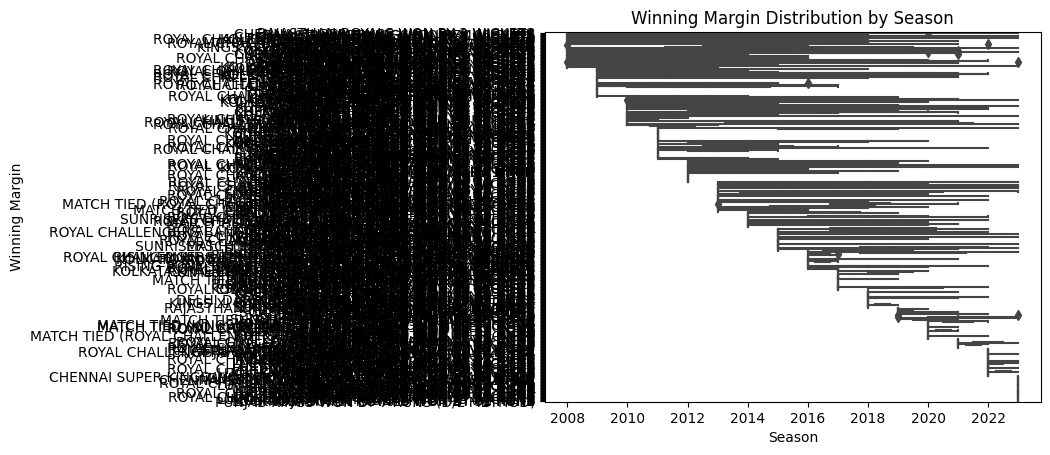

In [17]:
# Create boxplot
sns.boxplot(x=df['season'], y=df['winningteam'], data=df)
plt.title('Winning Margin Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Winning Margin')
plt.show()

Time Series Plot of Average Score:


In [18]:
# Convert dateandtime to datetime
data['dateandtime'] = pd.to_datetime(data['dateandtime'])
data = data[data['dateandtime'].between('1900-01-01', '2100-12-31')]

# Resample by hour and calculate average score
resampled_data = data.resample('H')['winning_team'].value_counts(normalize=True)

# Create time series plot
resampled_data.plot(kind='line')
plt.title('Average Winning Team by Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency of Winning Team')
plt.show()


/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


OutOfBoundsDatetime: ignored

Visualize distribution of key variables:

<ipython-input-19-8b9c2cf7b6d6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['season'])


<Axes: xlabel='season', ylabel='Density'>

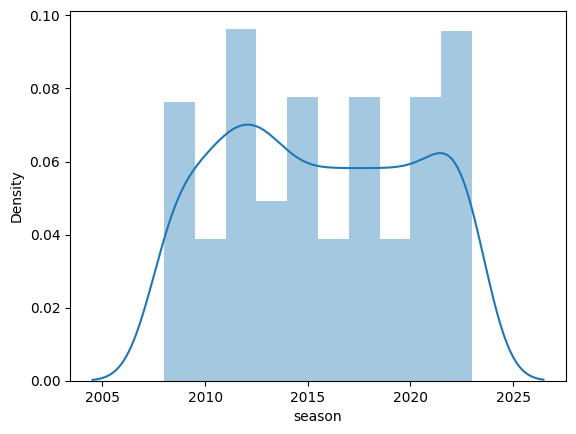

In [19]:
import seaborn as sns
sns.distplot(df['season'])


<ipython-input-20-01c82a506925>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['season'])


<Axes: xlabel='season', ylabel='Density'>

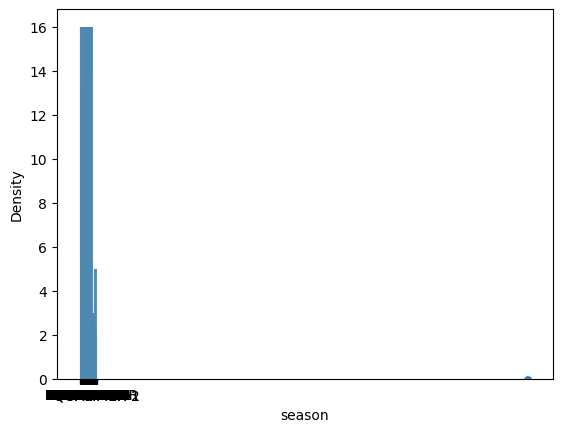

In [20]:
sns.distplot(df['season'])
# sns.countplot(df['winningteam']).astype('category')
sns.histplot(df['matchnumber'])

**2. Correlation Analysis**

---



calculate correlation matrix

In [21]:
correlation_matrix = df.corr()

<ipython-input-21-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


visualize correlations

<Axes: >

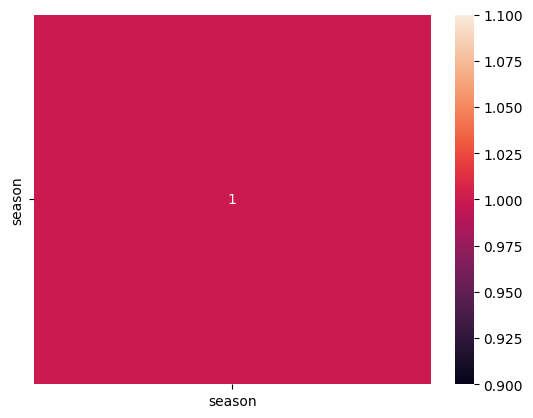

In [22]:
sns.heatmap(correlation_matrix, annot=True)

**3. Pattern Recognition**

---



Identifying trends in winning teams across seasons:

<Axes: xlabel='season', ylabel='winningteam'>

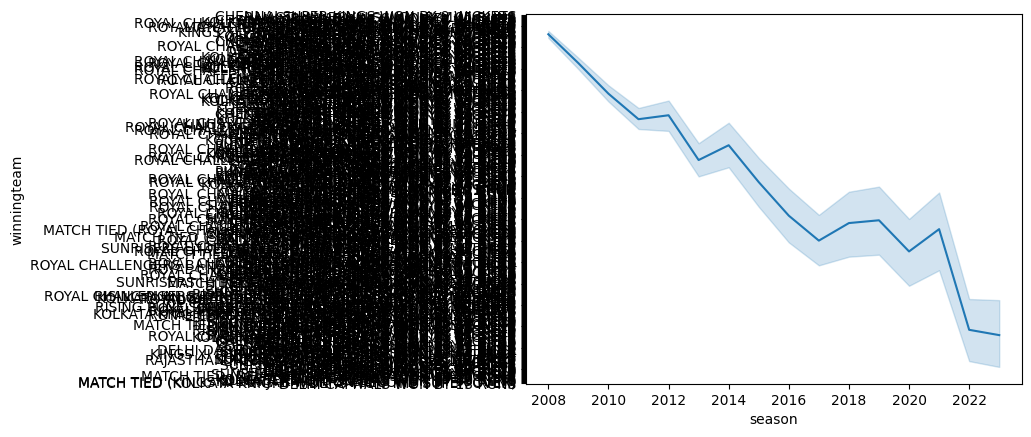

In [23]:
sns.lineplot(x='season', y='winningteam', data=data)

Analyze performance of teams based on venue:

In [24]:
sns.barplot(x='venue', y='winningteam', data=df)

TypeError: ignored

In [25]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

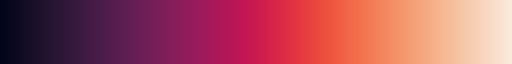

In [26]:
sns.color_palette("rocket", as_cmap=True)

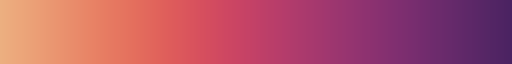

In [27]:
sns.color_palette("flare", as_cmap=True)

Winning Teams Across seasons:

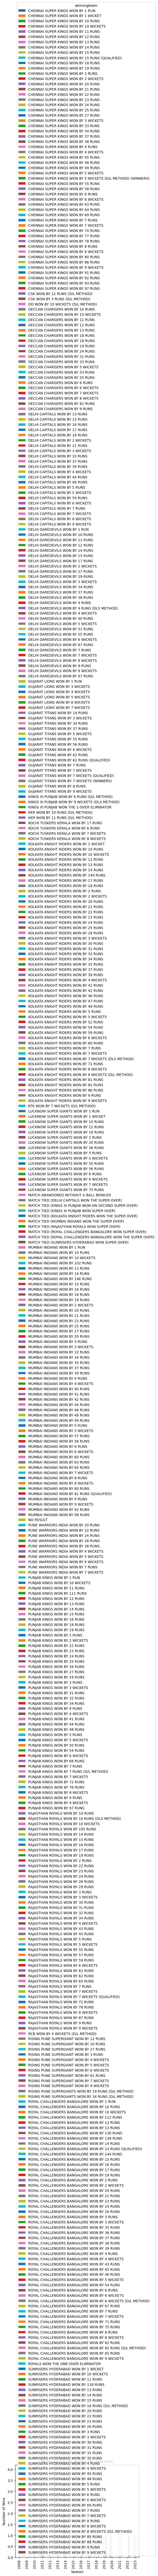

In [28]:
data.groupby('season')['winningteam'].value_counts().unstack().plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.title('Winning Teams across IPL Seasons')
plt.show()

AttributeError: ignored

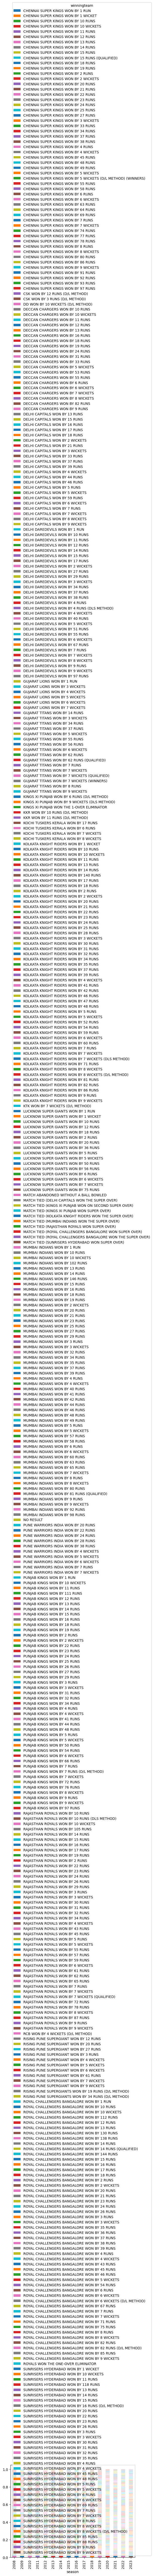

In [29]:
plot=data.groupby('season')['winningteam'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
cbar = plot.colorbar(plot, location='bottom')
plt.xlabel('Season')
plt.ylabel('Proportion of Wins')
plt.title('Winning Teams Proportion across IPL Seasons')
plt.show()


Emerging and Declining teams:

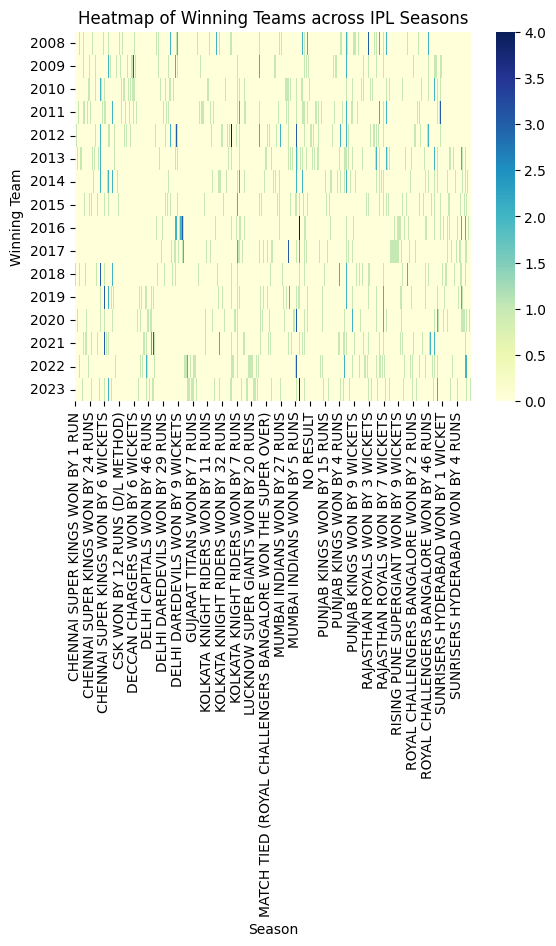

In [30]:
# data['winningteam'] = data['winningteam'].drop_duplicates()
pivot_table = data.groupby(['season', 'winningteam']).size().unstack(fill_value=0)
# pivot_table = data.pivot_table(index='season', columns='winningteam', values='winningteam', aggfunc='count')
sns.heatmap(pivot_table, cmap='YlGnBu', annot=False)
plt.xlabel('Season')
plt.ylabel('Winning Team')
plt.title('Heatmap of Winning Teams across IPL Seasons')
plt.show()

Team Dominance over time:

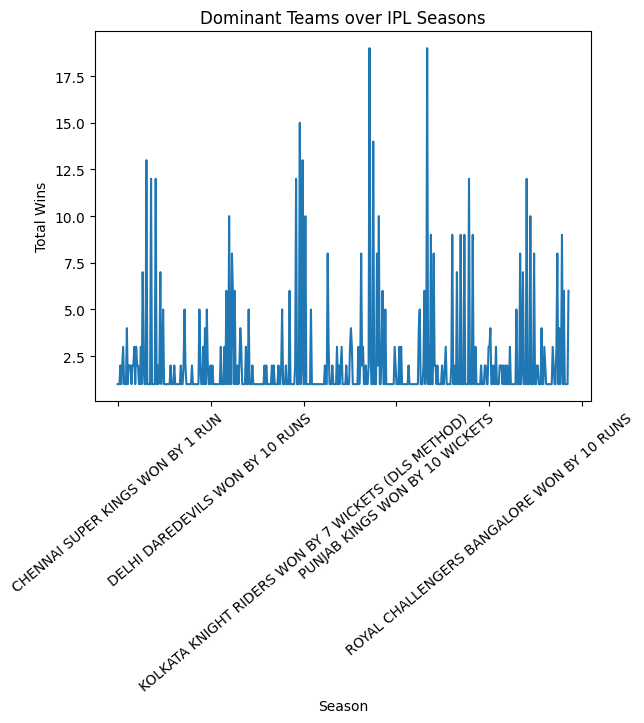

In [36]:
data.groupby('winningteam')['winningteam'].count().plot(kind='line')
plt.xlabel('Season')
plt.ylabel('Total Wins')
plt.title('Dominant Teams over IPL Seasons')
plt.xticks(rotation=40)
plt.show()


**4. Skill and Technology Trends Visualization**

---



**5. Geographical Analysis Representation**

---



Visualize distribution of matches across cities:

In [37]:
import seaborn as sns
sns.countplot(df['venue'])
# plt.bar(df['venue'].value_counts().index, df['venue'].value_counts().values)
plt.show()

ValueError: ignored

In [38]:
import pandas as pd
from geopy.geocoders import Nominatim
import folium

# Assuming 'data' is your DataFrame with a 'venue' column

# Create a geolocator using Nominatim
geolocator = Nominatim(user_agent="my_geocoder")

# Function to get coordinates for a venue
def get_coordinates(venue):
    location = geolocator.geocode(venue)
    if location:
        return location.latitude, location.longitude
    else:
        return None

# Apply the function to the 'venue' column
data['coordinates'] = data['venue'].apply(get_coordinates)

# Drop rows with missing coordinates
data = data.dropna(subset=['coordinates'])

# Create a map centered around the first venue
map_center = data['coordinates'].iloc[0]

# Create a folium map
venue_map = folium.Map(location=map_center, zoom_start=10)

# Add markers for each venue
for index, row in data.iterrows():
    folium.Marker(location=row['coordinates'], popup=row['venue']).add_to(venue_map)

# Save the map to an HTML file or display it
venue_map.save('venue_map.html')
# venue_map


In [39]:
!pip install folium --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.0/97.0 kB 1.4 MB/s eta 0:00:00
  Attempting uninstall: folium
    Found existing installation: folium 0.14.0
    Uninstalling folium-0.14.0:
      Successfully uninstalled folium-0.14.0


In [40]:
!pip install folium.parse

ERROR: Could not find a version that satisfies the requirement folium.parse (from versions: none)
ERROR: No matching distribution found for folium.parse


In [41]:
import folium
# from folium.parse import parse_html

with open("venue_map.html", "r") as f:
  map_html = f.read()
location = parse_html(map_html)["location"]

map_object = folium.Map(location)
map_object.show()

NameError: ignored

**6. Bonus**

---

